# Partial differential equations

A partial differential equation, often abbreviated as PDE, is an equation that involves multiple independent variables, partial derivatives, and an unknown function. Many processes, including many problems in physics, engineering, and finance, are described using partial differential equations. We will see many examples of partial difference equations, and how to solve them, within these course notes.

A <i>multivariate function</i> is a function of several variables, e.g., $f(x,y) = xy$. In physics, most state variables are defined within space and time, giving four variables. For example, the pressure field within a porous medium (e.g., an aquifer) is a function of the spatial variables and time, and can be written as $p = p(x,y,z,t)$. For a multivariate function $f$, a <i>partial derivative</i> is a derivative with respect to one variable when the other variables are held constant. It is unfortunately denoted in many different ways. The partial derivative $\partial f / \partial x$ of $f$ with respect to $x$ is then the derivative $df/dx$ when all other variables are held constant:

\begin{equation}
\frac{\partial f}{\partial x} = \left. \frac{df}{dx} \right|_{y,\dots} = \lim_{h \to 0} \frac{f(x+h,y,\dots)-f(x,y,\dots)}{h}
\end{equation}

A partial differential equation, often abbreviated as PDE, is a function of partial derivatives of multivariate functions. In contrast to ordinary differential equations, the unknown function in partial differential equations depends on several variables, e.g., in the following equation, the function $f = f(x,t)$ is a function of both $x$ and $t$:
$$\frac{\partial^2 f}{\partial x^2} = \frac{\partial f}{\partial t}$$

There is a range of classes of partial differential equations. The <i>order</i> of a partial differential equation is the highest partial derivative in the equation, e.g., the equation above is a second-order partial differential equation since the highest partial derivative is the partial derivative $\partial^2 f / \partial x^2$ of order two.

A partial differential equation is called <i>linear</i> if it is a linear combination of the unknown function $f$ and its derivatives. All second-order linear partial differential equations in two variables are therefore of the form
$$A \frac{\partial^2 f}{\partial x^2} + B \frac{\partial^2 f}{\partial x \partial y} + C \frac{\partial^2 f}{\partial y^2} + D \frac{\partial f}{\partial x} +  E \frac{\partial f}{\partial y} + F f + G = 0$$
There are three basic types of second-order linear partial differential equations:
\begin{align}
 \text{Elliptic:} \quad & B^2-4AC<0  \\
 \text{Parabolic:} \quad & B^2-4AC=0  \\ 
 \text{Hyperbolic:} \quad & B^2-4AC>0  
\end{align}

The naming stems from the resemblance to the equations for conic sections. A conic is a plane curve of order two, i.e., a solution to a quadratic equation of two variables:
$$Ax^2 +Bxy + Cy^2 +Dx + Ey +F = 0$$
The equation for an ellipse is
$$\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$$
where $a,b >0$. This gives $B^2-4AC = 0 - 4a^{-2}b^{-2}<0$, as in the PDE definition of an elliptic equation. A parabola is of the form $y^2 = 4ax$, which gives $B^2-4AC = 0$, and a hyperbola is given by
$$\frac{x^2}{a^2} - \frac{y^2}{b^2} = 1$$
gives $B^2-4AC = 0 + 4a^{-2}b^{-2}>0$, as in the PDE definition of a hyperbolic equation. 

In the plot below, we plot these different types of conic sections.

/tmp/ipykernel_3436/675452056.py:26: RuntimeWarning: invalid value encountered in sqrt
  afYhyperbola = np.sqrt((afXhyperbola**2 / fa**2 - 1) * fb**2)


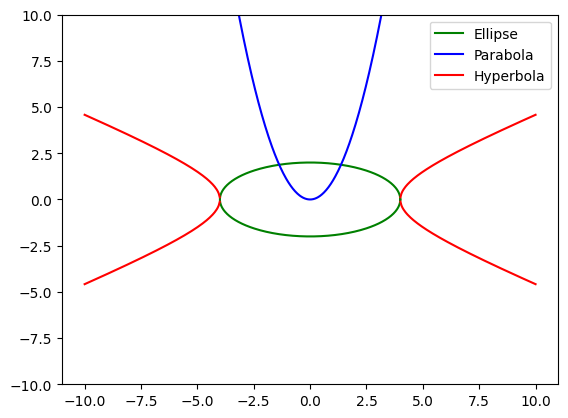

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plot ellipse, parabole and hyperbole
fig = plt.figure()

# Two positive numbers
fa, fb = 4, 2

# Ellipse: x^2/a^2 + y^2/b^2 = 1
# Parametric equations for ellipse
afTheta = np.linspace(0, 2 * np.pi, 400)
afXellipse = fa * np.cos(afTheta)
afYellipse = fb * np.sin(afTheta)
plt.plot(afXellipse, afYellipse, label='Ellipse',color='g')

# Parabola: y = x^2
afXparabola = np.linspace(-5, 5, 400)
afYparabola = afXparabola**2
plt.plot(afXparabola, afYparabola, label='Parabola',color='b')

# Hyperbola: x^2/a^2 - y^2/b^2 = 1
# Parametric equations for hyperbola
afXhyperbola = np.linspace(-10, -1.1, 200)
afXhyperbola = np.append(afXhyperbola, np.linspace(1.1, 10, 200))
afYhyperbola = np.sqrt((afXhyperbola**2 / fa**2 - 1) * fb**2)
plt.plot(afXhyperbola, afYhyperbola, label='Hyperbola',color='r')
plt.plot(afXhyperbola, -afYhyperbola,color='r')

plt.ylim(-10, 10)
plt.legend()
plt.show()


The elliptic equations are typical for steady-state problems, such as the Laplace equation. The parabolic equations are typical for diffusion-like processes, such as the propagation of pressure from fluid flow or heat diffusion. The hyperbolic equations are typical for wave-like phenomena, such as sonic waves passing through the subsurface.

These three types of partial differential equations will be visited in the following sections.


## Finite difference approximation

We already mentioned finite difference approximation when considering ordinary differential equations. In numerical methods, we use finite differences to approximate derivatives. When we replace a derivative with a finite difference, we are doing an approximation, and the resulting system is our numerical scheme. We tend to use different notation for values in the numerical scheme and the exact values, as we already did using $y_i$ as a numerical value for $y(t_i)$ when we considered ordinary differential equations.

We will consider several types of finite differences: forward, backward, and centered for a first-order derivative, and centered for a second-order derivative. The first-order derivative finite differences are noted as follows:
\begin{align}
D_+ f(x) &= \frac{f(x+\Delta x) - f(x)}{\Delta x} \\
D_- f(x) &= \frac{f(x)-f(x-\Delta x)}{\Delta x} \\
D_0 f(x) &= \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x}
\end{align}
Here, $D_x$ is the forward finite difference approximation, $D_-$ is the backward finite difference approximation, and $D_0$ is the centered finite difference approximation.

For the second-order derivative, we will only use the centered:
$$D^2_0 f(x) = \frac{f(x+\Delta x) - 2f(x) + f(x-\Delta x)}{(\Delta x)^2}$$
All the different $D$ above are considered as operators on the function $f$, and they have different orders of approximation. The order of approximation can be found from a Taylor expansion, and yields an order $\mathcal{O}(\Delta x)$ for the first-order derivative approximations $D_+$, $D_-$, an order $\mathcal{O}(\Delta x^2)$ for the first-order derivative approximationand $D_0$, and $\mathcal{O}(\Delta x^2)$ for the second-order derivative approximation $D^2_0$.

All of these finite difference approximations will be used in the following sections to replace the partial differential equations with numerical schemes. The associated exercise will explore additional finite differences.


[Previous note](ordinaryDifferentialEquations.ipynb) -- [Next note](ellipticEquations.ipynb)